IMPORTING THE REQUIRED DEPENDENCIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...

Ellipsis

LOADING THE DATA

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv("../Resources/telecom_customer_churn.csv")
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

DATA CLEANING

In [3]:
df = df[df['Customer Status'] != 'Joined']
df

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7037  9986-BONCE  Female   36      No                     0     Fallbrook   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7037     92028  33.362575 -117.299644                    0  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7037  Bank Withdrawal          20.95         85.50           0.00   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7037                        0                        8.04         93.54   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7037          Churned       Competitor   

In [14]:
df['Churn Category'] = df['Churn Category'].replace(np.nan,'satisfied')
df['Internet Type'] = df['Internet Type'].replace(np.nan,'No')
df['Multiple Lines'] = df['Multiple Lines'].replace(np.nan,'No')
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].replace(np.nan,0)
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].replace(np.nan,0)
df['Multiple Lines']=df['Multiple Lines'].replace(np.nan,'No')
df['Internet Service']= df['Internet Service'].replace(np.nan,'No')
df['Online Security']= df['Online Security'].replace(np.nan,'No')
df['Online Backup']= df['Online Backup'].replace(np.nan,'No')
df['Device Protection Plan']= df['Device Protection Plan'].replace(np.nan,'No')
df['Premium Tech Support']= df['Premium Tech Support'].replace(np.nan,'No')
df['Streaming TV']= df['Streaming TV'].replace(np.nan,'No')
df['Streaming Music']= df['Streaming Music'].replace(np.nan,'No')
df['Unlimited Data']= df['Unlimited Data'].replace(np.nan,'No')
df['Streaming Movies']= df['Streaming Movies'].replace(np.nan,'No')

DATA VISUALIZATION  AND DETAILED ANALYSIS

In [15]:
fig0 = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Customer Status", size="Age", animation_frame="Tenure in Months",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4,
                  mapbox_style="carto-positron")
fig0.show()
with open('p_graph.html', 'a') as f:
    f.write(fig0.to_html(full_html=False, include_plotlyjs='cdn'))

In [16]:
fig7 = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Monthly Charge", size="Age", animation_frame="Tenure in Months",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4,
                  mapbox_style="carto-positron")
fig7.show()


In [17]:
fig = px.histogram(df, x='Total Revenue')
fig

In [18]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')
fig1 = px.histogram(df, x="Monthly Charge", color="Customer Status", marginal="rug", hover_data=df_object.columns,animation_frame="Tenure in Months")
fig1.show()
with open('graph1.html', 'a') as f:
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))


In [19]:

bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
df_object['AgeRange'] = pd.cut(df['Age'],bins, labels=names,include_lowest=True)
fig4 =px.box(df_object.join(df_num),x='AgeRange',y='Avg Monthly GB Download', color ='Customer Status')
fig4
with open('graph2.html', 'a') as f:
    f.write(fig4.to_html(full_html=False, include_plotlyjs='cdn'))

In [20]:
fig5 =px.box(df_object.join(df_num),x='AgeRange',y='Tenure in Months', color ='Customer Status')
fig5
with open('graph3.html', 'a') as f:
    f.write(fig5.to_html(full_html=False, include_plotlyjs='cdn'))

In [21]:
fig6 =px.box(df_object.join(df_num),x='Gender',y='Tenure in Months', color ='Customer Status')
fig6
with open('graph4.html', 'a') as f:
    f.write(fig6.to_html(full_html=False, include_plotlyjs='cdn'))

In [22]:
fig8 = px.scatter_matrix(df, dimensions=["Age", "Total Revenue", "Tenure in Months","Avg Monthly Long Distance Charges"], color="Customer Status",width=1200, height=1200)
fig8.show()
with open('graph5.html', 'a') as f:
    f.write(fig8.to_html(full_html=False, include_plotlyjs='cdn'))

DATA PREPROCESING FOR MODELLING WITH GRAPHS TO HELP IN DECISION MAKING[Data exploration]

In [13]:
df = df.drop(['Churn Reason','Customer ID','City','Total Refunds','Zip Code','Latitude','Longitude','Total Extra Data Charges','Total Charges'],axis=1)
df.head()

Gender  Age Married  Number of Dependents  Number of Referrals  \
0  Female   37     Yes                     0                    2   
1    Male   46      No                     0                    0   
2    Male   50      No                     0                    0   
3    Male   78     Yes                     0                    1   
4  Female   75     Yes                     0                    3   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 9     None           Yes                              42.39   
1                 9     None           Yes                              10.69   
2                 4  Offer E           Yes                              33.65   
3                13  Offer D           Yes                              27.82   
4                 3     None           Yes                               7.38   

  Multiple Lines  ... Streaming Music Unlimited Data        Contract  \
0             No  ...              No            Yes        One Year   
1            Yes  ...             Yes             No  Month-to-Month   
2             No  ...              No            Yes  Month-to-Month   
3             No  ...              No            Yes  Month-to-Month   
4             No  ...              No            Yes  Month-to-Month   

  Paperless Billing   Payment Method Monthly Charge  \
0               Yes      Credit Card           65.6   
1                No      Credit Card           -4.0   
2               Yes  Bank Withdrawal           73.9   
3               Yes  Bank Withdrawal           98.0   
4               Yes      Credit Card           83.9   

  Total Long Distance Charges Total Revenue Customer Status   Churn Category  
0                      381.51        974.81          Stayed        satisfied  
1                       96.21        610.28          Stayed        satisfied  
2                      134.60        415.45         Churned       Competitor  
3                      361.66       1599.51         Churned  Dissatisfaction  
4                       22.14        289.54         Churned  Dissatisfaction  

[5 rows x 29 columns]

In [14]:
def foo(x):
    if x == 'Stayed':
        return 0
    elif x == 'Churned':
        return 1
    else:
        return x
df['Customer Status']=df['Customer Status'].apply(lambda x : foo(x))
df

Gender  Age Married  Number of Dependents  Number of Referrals  \
0     Female   37     Yes                     0                    2   
1       Male   46      No                     0                    0   
2       Male   50      No                     0                    0   
3       Male   78     Yes                     0                    1   
4     Female   75     Yes                     0                    3   
...      ...  ...     ...                   ...                  ...   
7037  Female   36      No                     0                    0   
7038  Female   20      No                     0                    0   
7039    Male   40     Yes                     0                    1   
7041    Male   21     Yes                     0                    5   
7042    Male   36     Yes                     0                    1   

      Tenure in Months    Offer Phone Service  \
0                    9     None           Yes   
1                    9     None           Yes   
2                    4  Offer E           Yes   
3                   13  Offer D           Yes   
4                    3     None           Yes   
...                ...      ...           ...   
7037                 4     None           Yes   
7038                13  Offer D           Yes   
7039                22  Offer D           Yes   
7041                67  Offer A           Yes   
7042                63     None            No   

      Avg Monthly Long Distance Charges Multiple Lines  ... Streaming Music  \
0                                 42.39             No  ...              No   
1                                 10.69            Yes  ...             Yes   
2                                 33.65             No  ...              No   
3                                 27.82             No  ...              No   
4                                  7.38             No  ...              No   
...                                 ...            ...  ...             ...   
7037                               2.01             No  ...              No   
7038                              46.68             No  ...             Yes   
7039                              16.20            Yes  ...             Yes   
7041                               2.12             No  ...             Yes   
7042                               0.00             No  ...             Yes   

     Unlimited Data        Contract Paperless Billing   Payment Method  \
0               Yes        One Year               Yes      Credit Card   
1                No  Month-to-Month                No      Credit Card   
2               Yes  Month-to-Month               Yes  Bank Withdrawal   
3               Yes  Month-to-Month               Yes  Bank Withdrawal   
4               Yes  Month-to-Month               Yes      Credit Card   
...             ...             ...               ...              ...   
7037             No  Month-to-Month                No  Bank Withdrawal   
7038            Yes        One Year                No      Credit Card   
7039            Yes  Month-to-Month               Yes  Bank Withdrawal   
7041            Yes        Two Year                No      Credit Card   
7042            Yes        Two Year                No  Bank Withdrawal   

     Monthly Charge Total Long Distance Charges Total Revenue Customer Status  \
0             65.60                      381.51        974.81               0   
1             -4.00                       96.21        610.28               0   
2             73.90                      134.60        415.45               1   
3             98.00                      361.66       1599.51               1   
4             83.90                       22.14        289.54               1   
...             ...                         ...           ...             ...   
7037          20.95                        8.04         93.54               1   
7038          55.15                      606.84       1349.74     

<AxesSubplot:>

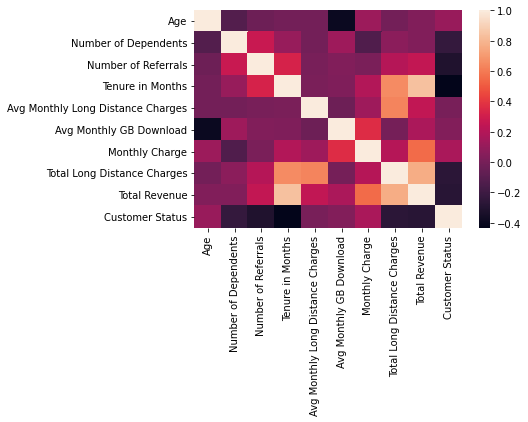

In [15]:

corr= df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [16]:
df.nunique()

Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3452
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                    

In [17]:
df.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Long Distance Charg

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   object 
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   object 
 3   Number of Dependents               6589 non-null   int64  
 4   Number of Referrals                6589 non-null   int64  
 5   Tenure in Months                   6589 non-null   int64  
 6   Offer                              6589 non-null   object 
 7   Phone Service                      6589 non-null   object 
 8   Avg Monthly Long Distance Charges  6589 non-null   float64
 9   Multiple Lines                     6589 non-null   object 
 10  Internet Service                   6589 non-null   object 
 11  Internet Type                      6589 non-null   objec

In [19]:
print(df['Customer Status'].value_counts())
100. * df['Customer Status'].value_counts() / len(df['Customer Status'])


0    4720
1    1869
Name: Customer Status, dtype: int64


0    71.634542
1    28.365458
Name: Customer Status, dtype: float64

<AxesSubplot:>

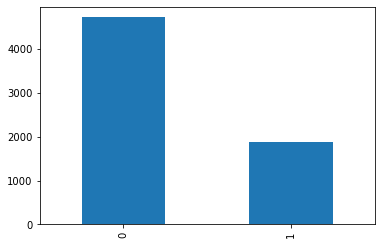

In [20]:
df['Customer Status'].value_counts().plot(kind='bar')

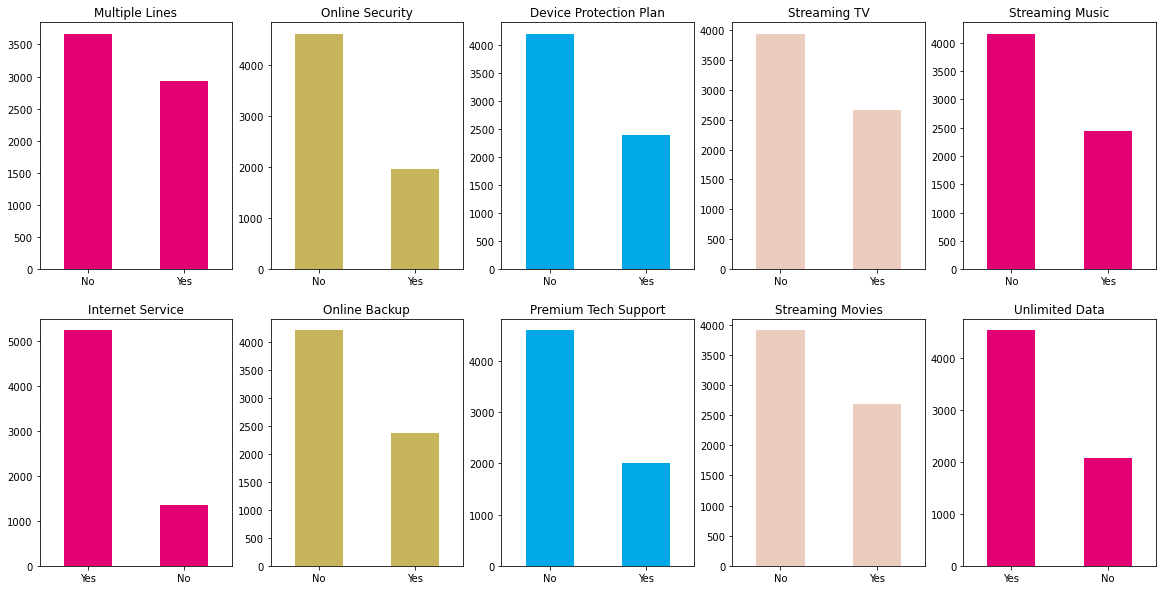

In [21]:
#SUBPLOTS FOR SERVICE DATA

service_labels = ['Multiple Lines', 'Internet Service','Online Security',
                'Online Backup','Device Protection Plan',
                'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']

# bar charts
fig3, axes = plt.subplots(nrows = 2, ncols = 5,figsize = (20,10))
for i, item in enumerate(service_labels):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i,0], rot = 0, color ='#e20074')
        ax.set_title(item)
    elif i >=2 and i < 4:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-2,1], rot = 0,color ='#c8b45a')
        ax.set_title(item)
    elif i >=4 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-4,2],rot = 0,color = '#00a8e6')
        ax.set_title(item)
    elif i >=6 and i < 8:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-6,3],rot = 0,color = '#ecccbf')
        ax.set_title(item)
    elif i < 10:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-8,4],rot = 0,color = '#e20074')
        ax.set_title(item)

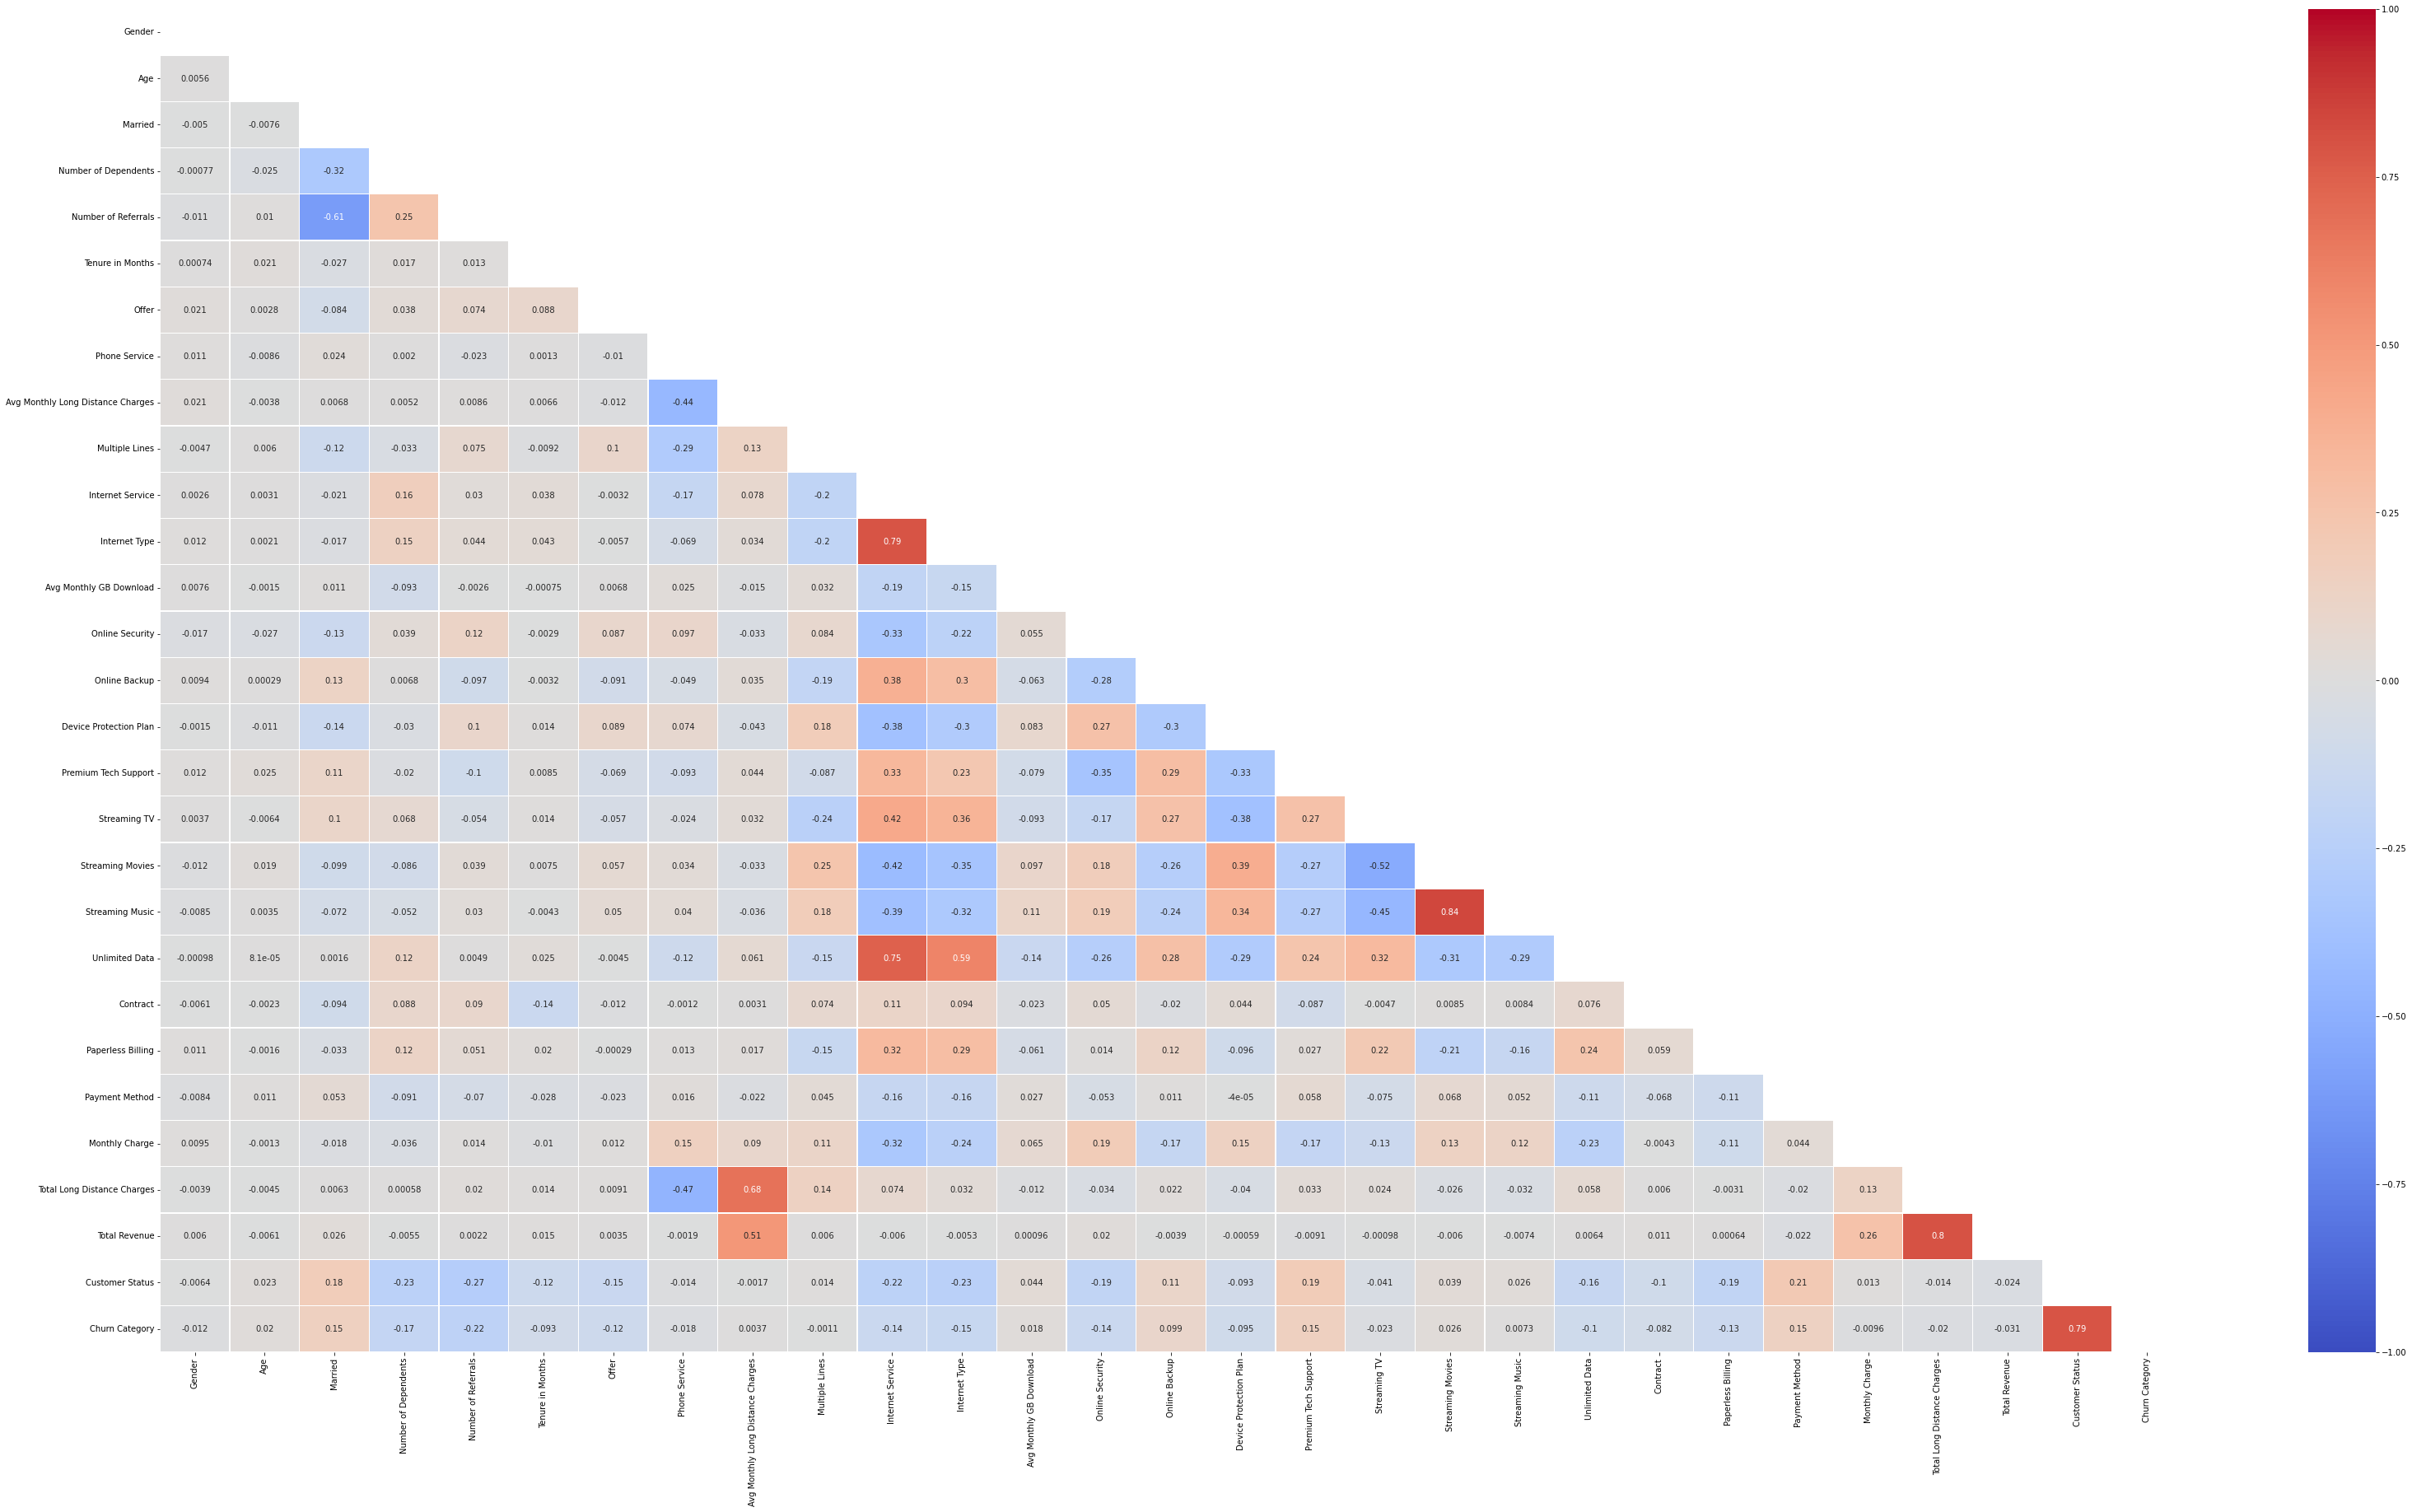

In [22]:
# Correlation between all variables
plt.figure(5, figsize=(55, 30))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


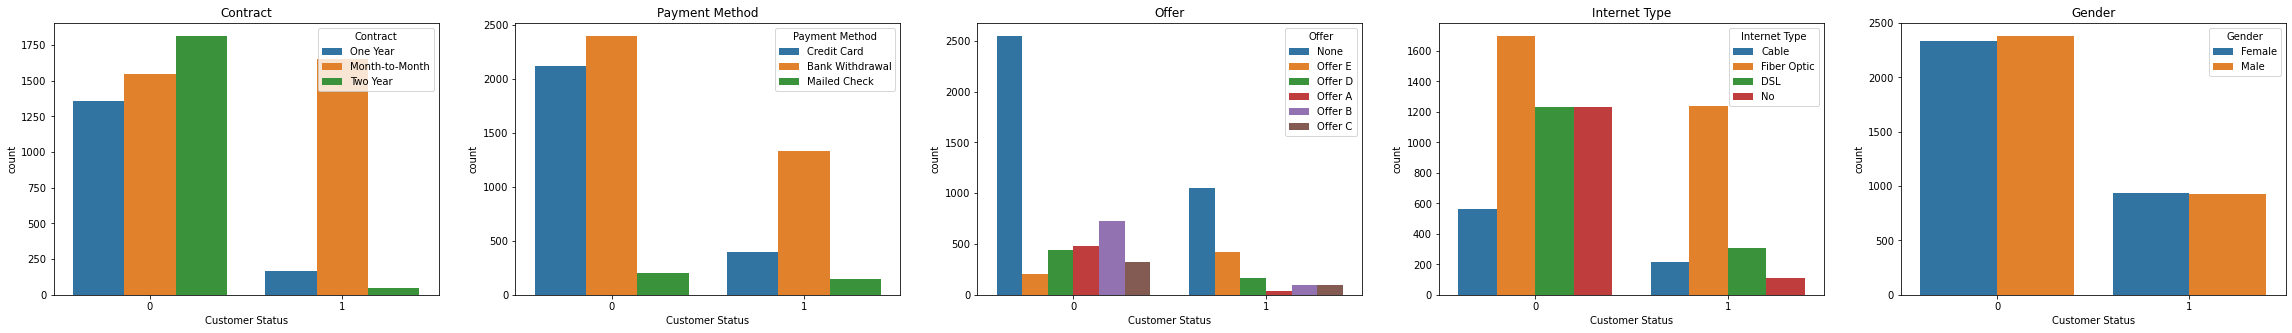

In [23]:
## Correlation between churn and  object datatype
cols = ['Contract',"Payment Method","Offer","Internet Type",'Gender']

plt.figure(figsize=(40,5))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Customer Status", hue = str(col), data = df)
    ax.set_title(f"{col}")


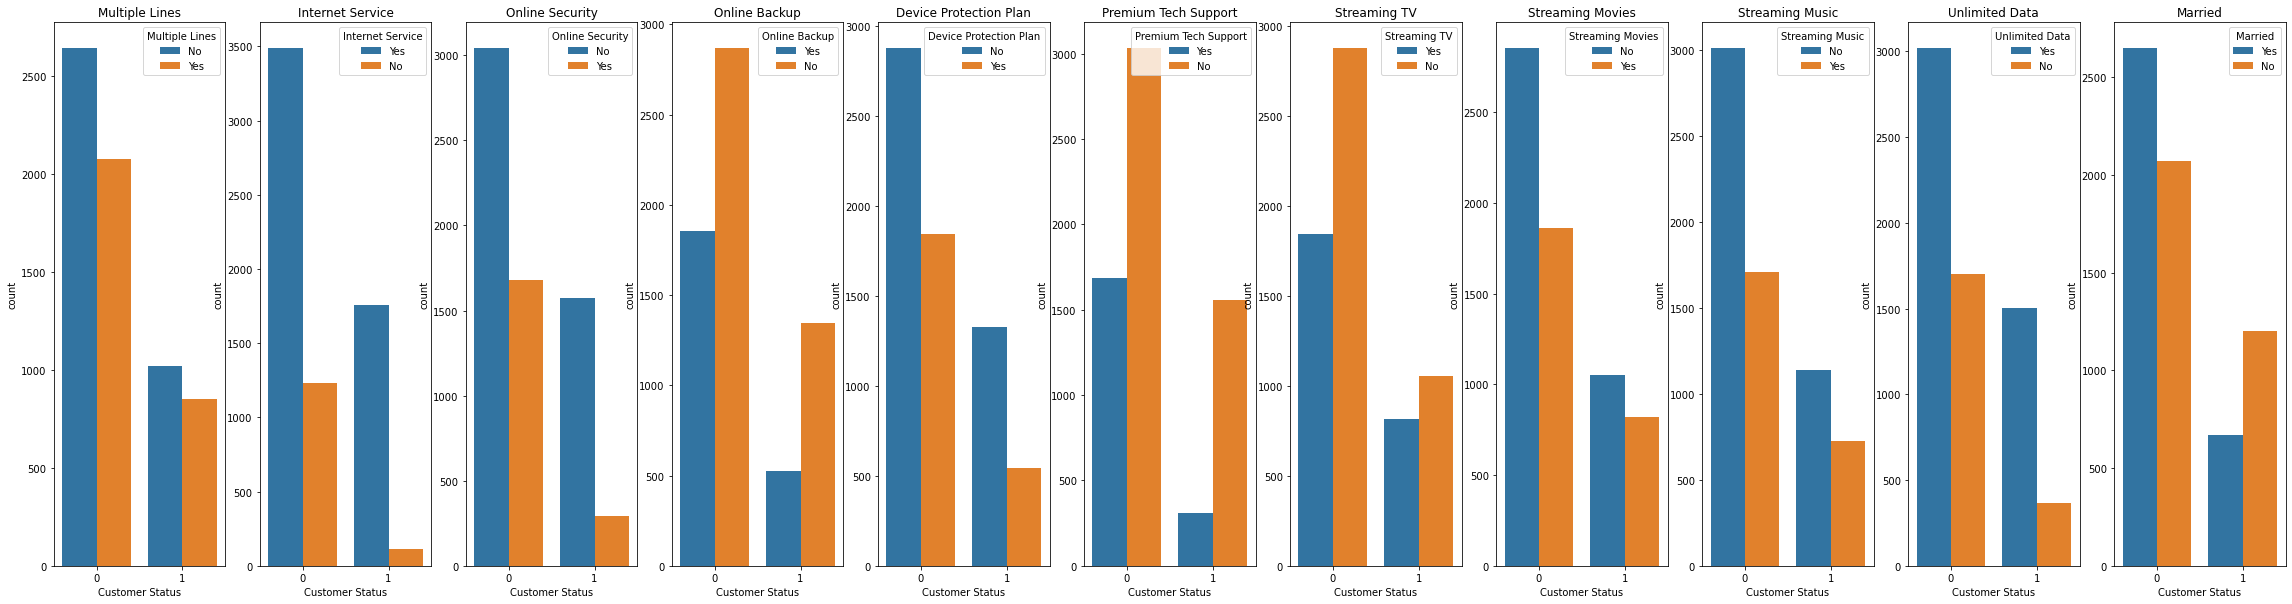

In [24]:
# Correlation between churn and categorical data

cols = ['Multiple Lines', 'Internet Service','Online Security',
                'Online Backup','Device Protection Plan',
                'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Married']


plt.figure(figsize=(40,10))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Customer Status", hue = str(col), data = df)
    ax.set_title(f"{col}")

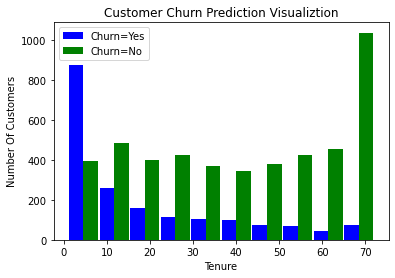

In [25]:
tenurechurn_no = df[df['Customer Status']== 0]['Tenure in Months']
tenurechurn_yes = df[df['Customer Status']== 1]['Tenure in Months']

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenurechurn_yes, tenurechurn_no], rwidth=0.95, color=['blue','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

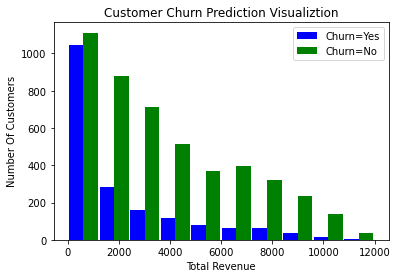

In [26]:
totalchargeschurn_no = df[df['Customer Status']== 0]['Total Revenue']
totalchargeschurn_yes = df[df['Customer Status']== 1]['Total Revenue']

plt.xlabel("Total Revenue")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([totalchargeschurn_yes, totalchargeschurn_no], rwidth=0.95, color=['blue','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

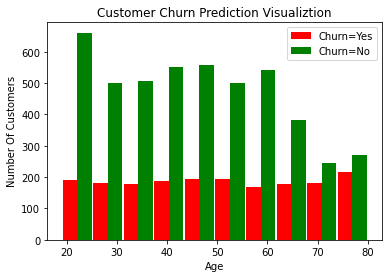

In [27]:
agechurn_no = df[df['Customer Status']== 0]['Age']
agechurn_yes = df[df['Customer Status']== 1]['Age']

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([agechurn_yes, agechurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

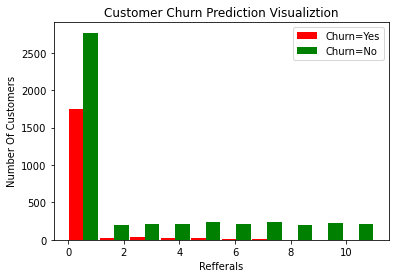

In [28]:
refchurn_no = df[df['Customer Status']== 0]['Number of Referrals']
refchurn_yes = df[df['Customer Status']== 1]['Number of Referrals']

plt.xlabel("Refferals")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([refchurn_yes, refchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

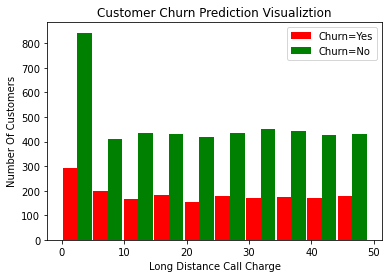

In [29]:
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].astype(int)
distchurn_no = df[df['Customer Status']== 0]['Avg Monthly Long Distance Charges']
distchurn_yes = df[df['Customer Status']== 1]['Avg Monthly Long Distance Charges']

plt.xlabel("Long Distance Call Charge")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([distchurn_yes, distchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

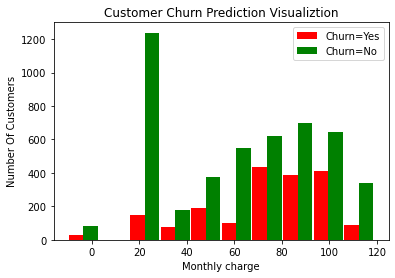

In [30]:
monthchurn_no = df[df['Customer Status']== 0]['Monthly Charge']
monthchurn_yes = df[df['Customer Status']== 1]['Monthly Charge']

plt.xlabel("Monthly charge")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([monthchurn_yes, monthchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

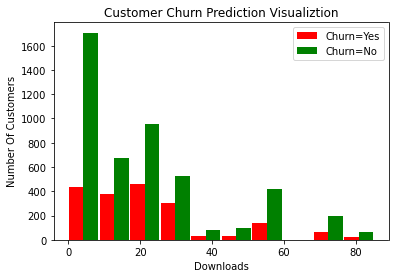

In [31]:
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].astype(int)
mdownchurn_no = df[df['Customer Status']== 0]['Avg Monthly GB Download']
mdownchurn_yes = df[df['Customer Status']== 1]['Avg Monthly GB Download']

plt.xlabel("Downloads")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mdownchurn_yes, mdownchurn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [32]:
#Supervised Learning is applied when we have a labelled data set i.e., we already have our output variable/dependent variable.
#1) Naive Bayes -- best applied to a data set containing multiple features (independent variable) and an output variable which takes two discrete value (Yes/No). Thus, categorical data.
#2) SVM -- best applied to a data set containing infinite number of features and you need to reduce these features down to a number so that it can be computed. Since it's a classification algorithm so it best works upon categorical data. 
#3) Regression -- Linear Regression is applied to a continuous numerical data set in which the dependent and independent variable exhibits linear relationship. For example, size of the house vs house price. Logistic Regression is a classification algorithm so it is best applied to categorical data. 3) K-Means -- K-Means can applied to many types of data sets. What it does is segmenting data points into clusters. Data points with similar features are clustered together.
#4) Neural Networks -- Neural Networks can be shallow neural networks and deep neural networks and both of these could be applied to supervised or unsupervised problem as it has separate algorithms for both the cases. It is the most powerful and popular class of ML algorithms. It can be used in every problem statement. Main intuition behind it learning from its own error. I do not have much knowledge about neural network so I will not write further more.

In [33]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

Gender: ['Female' 'Male']
Age: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 79 26 30 34 42 64 48 28 33
 31 60 69 20 57 19 38 35 72 51 66 61 24 55 59 71 49 40 21 45 29 62 76 77
 73 41 56 54 22 80 63 53 44 70 74 36 27 65]
Married: ['Yes' 'No']
Number of Dependents: [0 3 1 2 4 6 5 9 7 8]
Number of Referrals: [ 2  0  1  3  8  9 10  5  4  7  6 11]
Tenure in Months: [ 9  4 13  3 71 63  7 65 54 72  5 56 34 45  1 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Offer: ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service: ['Yes' 'No']
Avg Monthly Long Distance Charges: [42 10 33 27  7 16  9 12 28  0 18  2 31 43 34 35 19 37 38 49 23 30  5 25
 48  6 32 24 36 44 11 20 39  8 40 47 45 14  1 13 41 46 22  3 15 17  4 21
 26 29]
Multiple Lines: ['No' 'Yes']
Internet Service: ['Yes' 'No']
Internet Type: ['Cable' 'Fiber Optic' 'DSL' 'No']
Avg Monthly GB Download

In [34]:
cols = ['Internet Service', 'Payment Method', 'Churn Category', 'Gender', 'Phone Service', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Multiple Lines', 'Internet Type', 'Online Backup', 'Device Protection Plan','Customer Status','Paperless Billing', 'Online Security', 'Premium Tech Support', 'Unlimited Data', 'Married']

df[cols] = df[cols].astype('category')

# label encoding for categorical data candidates
for columns in cols:
    df[columns] = df[columns].cat.codes
# First we will copy data to new 'dataset' variable to conserve original values
data = df.copy()

# Hot-Encoding for categorical data
data = pd.get_dummies(data)
data.head()

      



Gender  Age  Married  Number of Dependents  Number of Referrals  \
0       0   37        1                     0                    2   
1       1   46        0                     0                    0   
2       1   50        0                     0                    0   
3       1   78        1                     0                    1   
4       0   75        1                     0                    3   

   Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  \
0                 9              1                                 42   
1                 9              1                                 10   
2                 4              1                                 33   
3                13              1                                 27   
4                 3              1                                  7   

   Multiple Lines  Internet Service  ...  Churn Category  Offer_None  \
0               0                 1  ...               5           1   
1               1                 1  ...               5           1   
2               0                 1  ...               1           0   
3               0                 1  ...               2           0   
4               0                 1  ...               2           1   

   Offer_Offer A  Offer_Offer B  Offer_Offer C  Offer_Offer D  Offer_Offer E  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              1              0   
4              0              0              0              0              0   

   Contract_Month-to-Month  Contract_One Year  Contract_Two Year  
0                        0                  1                  0  
1                        1                  0                  0  
2                        1                  0                  0  
3                        1                  0                  0  
4                        1                  0                  0  

[5 rows x 36 columns]

DATA PREPARATION FULFILLING THE BASIC ASSUMPTIONS OF MACHINE LEARNING MODELS AND PREDICTED OUTCOME
Prediction Outcome Nature - Binary outcome
Predicting whether the customer will churn or not
The basic assumptions for different machine learning models selected  based on the prediction outcome
1.Logistic regression-
a)The Response Variable is Binary
b)There is No Multicollinearity Among Explanatory Variables [We have done variance inflation factor  check and removed the variables that exhibit high collinearity]
c)The Sample Size is Sufficiently Large (more than 500 data points)
d) There are No Extreme Outliers (our data exploration box plots have shown no extreme outliers in the explantory or responsive variables)

2. Decision trees assume that the different predictors are independent and combine together to form a an overall likelihood of one class over another. 

In [35]:
#--------------------#
# MULTICOLLINEARITY  #
#--------------------#
#VIF starts at 1, and if the 10 value is exceeded, that will indicate high multicollinearity between the independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
# Calculating Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

ds_vif = data[['Total Long Distance Charges','Total Revenue','Monthly Charge','Number of Dependents','Avg Monthly GB Download','Avg Monthly Long Distance Charges','Age','Tenure in Months','Number of Referrals']]

vif = calculate_vif(ds_vif)
vif

variables  Variable Inflation Factors
0        Total Long Distance Charges                   13.610854
1                      Total Revenue                   23.461751
2                     Monthly Charge                   14.484799
3               Number of Dependents                    1.420475
4            Avg Monthly GB Download                    2.780663
5  Avg Monthly Long Distance Charges                    8.173173
6                                Age                    7.356141
7                   Tenure in Months                   12.690178
8                Number of Referrals                    1.730663

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

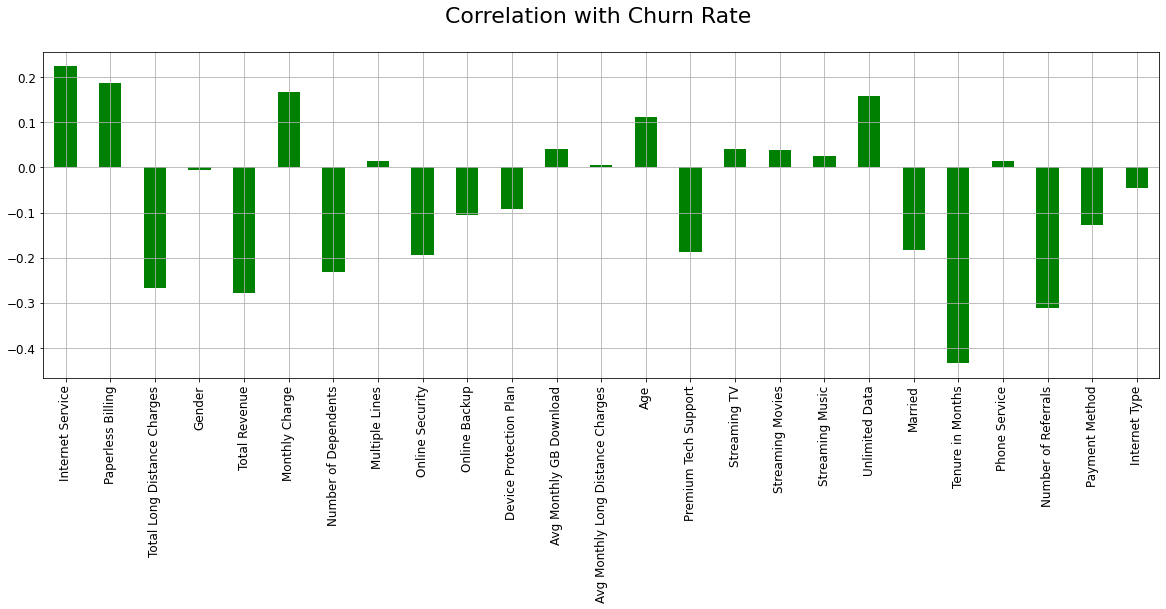

In [36]:
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)
ds_corr = data[['Internet Service','Paperless Billing','Total Long Distance Charges','Gender','Total Revenue','Monthly Charge','Number of Dependents','Multiple Lines','Online Security','Online Backup','Device Protection Plan','Avg Monthly GB Download','Avg Monthly Long Distance Charges','Age','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Married','Tenure in Months', 'Phone Service','Number of Referrals','Payment Method','Internet Type']]

correlations = ds_corr.corrwith(df['Customer Status'])
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (20, 6),
        fontsize = 12,
        color = 'green',
        rot = 90, grid = True)

plt.title('Correlation with Churn Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

Text(0.5, 1.0, 'Correlation with Monthly Rate \n')

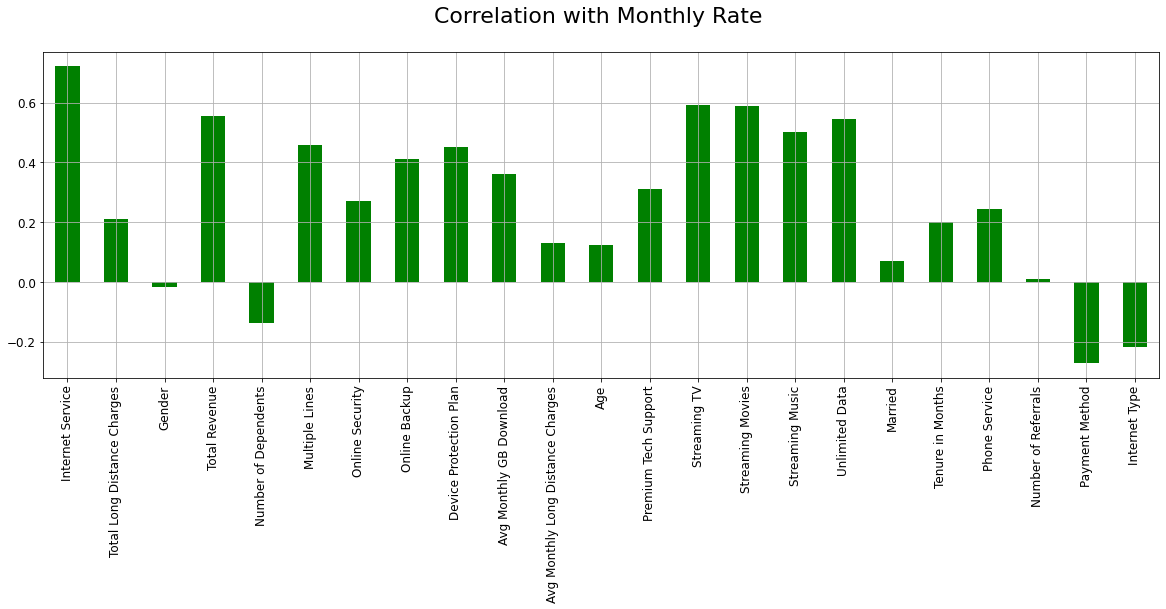

In [37]:
plt.figure(6)
ds_corr = data[['Internet Service','Total Long Distance Charges','Gender','Total Revenue','Number of Dependents','Multiple Lines','Online Security','Online Backup','Device Protection Plan','Avg Monthly GB Download','Avg Monthly Long Distance Charges','Age','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Married','Tenure in Months', 'Phone Service','Number of Referrals','Payment Method','Internet Type']]

correlations = ds_corr.corrwith(df['Monthly Charge'])
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (20, 6),
        fontsize = 12,
        color = 'green',
        rot = 90, grid = True)

plt.title('Correlation with Monthly Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

In [38]:
# we will drop 'Total Revenue'&'Total Long Distance Charges' from VIF test dataset.
#Here we are only considering the continuous variable & multinominal categorical and not the binary categorical data.
# categorical variables have a greater tendency to generate collinearity is that the three-way or four-way tabulations often form linear combinations that lead to complete collinearity
ds_vif2 = ds_vif.drop(columns = ["Total Revenue","Total Long Distance Charges"])

# check colinearity again
vif2 = calculate_vif(ds_vif2)
vif2

variables  Variable Inflation Factors
0                     Monthly Charge                    7.664299
1               Number of Dependents                    1.411882
2            Avg Monthly GB Download                    2.641029
3  Avg Monthly Long Distance Charges                    2.871899
4                                Age                    5.175831
5                   Tenure in Months                    3.399645
6                Number of Referrals                    1.729519

In [39]:
cols_to_scale = ['Total Long Distance Charges','Tenure in Months','Monthly Charge','Total Revenue','Avg Monthly GB Download','Avg Monthly Long Distance Charges','Age']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data

Gender       Age  Married  Number of Dependents  Number of Referrals  \
0          0  0.295082        1                     0                    2   
1          1  0.442623        0                     0                    0   
2          1  0.508197        0                     0                    0   
3          1  0.967213        1                     0                    1   
4          0  0.918033        1                     0                    3   
...      ...       ...      ...                   ...                  ...   
7037       0  0.278689        0                     0                    0   
7038       0  0.016393        0                     0                    0   
7039       1  0.344262        1                     0                    1   
7041       1  0.032787        1                     0                    5   
7042       1  0.278689        1                     0                    1   

      Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  \
0             0.112676              1                           0.857143   
1             0.112676              1                           0.204082   
2             0.042254              1                           0.673469   
3             0.169014              1                           0.551020   
4             0.028169              1                           0.142857   
...                ...            ...                                ...   
7037          0.042254              1                           0.040816   
7038          0.169014              1                           0.938776   
7039          0.295775              1                           0.326531   
7041          0.929577              1                           0.040816   
7042          0.873239              0                           0.000000   

      Multiple Lines  Internet Service  ...  Churn Category  Offer_None  \
0                  0                 1  ...               5           1   
1                  1                 1  ...               5           1   
2                  0                 1  ...               1           0   
3                  0                 1  ...               2           0   
4                  0                 1  ...               2           1   
...              ...               ...  ...             ...         ...   
7037               0                 0  ...               1           1   
7038               0                 1  ...               5           0   
7039               1                 1  ...               2           0   
7041               0                 1  ...               5           0   
7042               0                 1  ...               5           1   

      Offer_Offer A  Offer_Offer B  Offer_Offer C  Offer_Offer D  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              1   
4                 0              0              0              0   
...             ...            ...            ...            ...   
7037              0              0              0              0   
7038              0              0              0              1   
7039              0              0              0              1   
7041              1              0              0              0   
7042              0              0              0              0   

      Offer_Offer E  Contract_Month-to-Month  Contract_One Year  \
0                 0                        0                  1   
1                 0                        1                  0   
2                 1                        1                  0   
3                 0                        1                  0   
4                 0                        1                  0   
...             ...                 

In [40]:
data.dtypes

Gender                                  int8
Age                                  float64
Married                                 int8
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                     float64
Phone Service                           int8
Avg Monthly Long Distance Charges    float64
Multiple Lines                          int8
Internet Service                        int8
Internet Type                           int8
Avg Monthly GB Download              float64
Online Security                         int8
Online Backup                           int8
Device Protection Plan                  int8
Premium Tech Support                    int8
Streaming TV                            int8
Streaming Movies                        int8
Streaming Music                         int8
Unlimited Data                          int8
Paperless Billing                       int8
Payment Method                          int8
Monthly Ch

In [41]:
data= data.drop(['Internet Service','Payment Method','Avg Monthly GB Download',"Total Revenue","Total Long Distance Charges","Churn Category","Gender",'Phone Service','Avg Monthly Long Distance Charges',"Streaming TV",'Streaming Movies',"Streaming Music","Multiple Lines","Internet Type",'Online Backup','Device Protection Plan'],axis=1)

In [42]:
for col in data:
    print(f'{col}: {data[col].unique()}')

Age: [0.29508197 0.44262295 0.50819672 0.96721311 0.91803279 0.06557377
 0.78688525 0.54098361 0.80327869 0.39344262 0.45901639 0.09836066
 0.63934426 0.21311475 0.32786885 0.98360656 0.1147541  0.18032787
 0.24590164 0.37704918 0.73770492 0.47540984 0.14754098 0.2295082
 0.19672131 0.67213115 0.81967213 0.01639344 0.62295082 0.
 0.31147541 0.26229508 0.86885246 0.52459016 0.7704918  0.68852459
 0.08196721 0.59016393 0.6557377  0.85245902 0.49180328 0.3442623
 0.03278689 0.42622951 0.16393443 0.70491803 0.93442623 0.95081967
 0.8852459  0.36065574 0.60655738 0.57377049 0.04918033 1.
 0.72131148 0.55737705 0.40983607 0.83606557 0.90163934 0.27868852
 0.13114754 0.75409836]
Married: [1 0]
Number of Dependents: [0 3 1 2 4 6 5 9 7 8]
Number of Referrals: [ 2  0  1  3  8  9 10  5  4  7  6 11]
Tenure in Months: [0.11267606 0.04225352 0.16901408 0.02816901 0.98591549 0.87323944
 0.08450704 0.90140845 0.74647887 1.         0.05633803 0.77464789
 0.46478873 0.61971831 0.         0.69014085 0.30

In [43]:
X = data.drop('Customer Status',axis='columns')
y = data['Customer Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape

(5271, 19)

In [44]:
X_test.shape

(1318, 19)

In [45]:
X_train[:10]

Age  Married  Number of Dependents  Number of Referrals  \
4681  0.016393        0                     0                    0   
511   0.327869        0                     0                    0   
2842  0.491803        1                     2                    6   
2774  0.737705        0                     0                    0   
3264  0.688525        0                     0                    0   
5877  0.770492        0                     0                    0   
1371  0.098361        1                     0                    1   
3403  0.147541        1                     3                    3   
4925  0.967213        0                     0                    0   
4590  0.622951        1                     1                    6   

      Tenure in Months  Online Security  Premium Tech Support  Unlimited Data  \
4681          0.633803                0                     1               1   
511           1.000000                1                     1               1   
2842          1.000000                1                     1               1   
2774          0.915493                1                     1               1   
3264          0.000000                0                     0               0   
5877          0.014085                0                     0               1   
1371          0.521127                0                     0               1   
3403          1.000000                1                     1               0   
4925          0.267606                0                     0               1   
4590          0.154930                0                     0               0   

      Paperless Billing  Monthly Charge  Offer_None  Offer_Offer A  \
4681                  1        0.888544           0              0   
511                   0        0.750680           0              1   
2842                  0        0.912233           0              1   
2774                  0        0.611650           1              0   
3264                  1        0.227573           1              0   
5877                  1        0.267573           1              0   
1371                  1        0.812816           1              0   
3403                  1        0.724660           1              0   
4925                  0        0.631456           0              0   
4590                  0        0.236893           1              0   

      Offer_Offer B  Offer_Offer C  Offer_Offer D  Offer_Offer E  \
4681              1              0              0              0   
511               0              0              0              0   
2842              0              0              0              0   
2774              0              0              0              0   
3264              0              0              0              0   
5877              0              0              0              0   
1371              0              0              0              0   
3403              0              0              0              0   
4925              0              0              1              0   
4590              0              0              0              0   

      Contract_Month-to-Month  Contract_One Year  Contract_Two Year  
4681                        0                  0                  1  
511                         0                  0                  1  
2842                        0                  0                  1  
2774                        0                  0                  1  
3264                        1                  0                  0  
5877                        1                  0                  0  
1371                        1                  0                  0  
3403                        0                  0                  1  
4925                        1                  0                  0  
4590                        1                  0                  0

In [46]:
data.columns

Index(['Age', 'Married', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Online Security', 'Premium Tech Support',
       'Unlimited Data', 'Paperless Billing', 'Monthly Charge',
       'Customer Status', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year'],
      dtype='object')

A fit refers to how well you approximate a target function.A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.The main intuitive difference between the L1 and L2 regularization is that L1 regularization tries to estimate the median of the data while the L2 regularization tries to estimate the mean of the data to avoid overfitting.

In [47]:

from sklearn.linear_model import LogisticRegression
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
from sklearn.linear_model import LogisticRegressionCV
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [48]:
lr_l2.score(X_test, y_test)

0.842185128983308

In [49]:
y_pred =list()
y_prob =list()
coeff_labels = ['lr','l1','l2']
coeff_models = [lr, lr_l1,lr_l2]

for lab, mod in zip(coeff_labels,coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test),name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1),name=lab))
    
y_pred= pd.concat(y_pred, axis=1)
y_prob=pd.concat(y_prob, axis=1)

y_pred.apply(pd.Series.value_counts)

lr   l1   l2
0  950  950  948
1  368  368  370

In [50]:
y_prob.head()

lr        l1        l2
0  0.994051  0.994265  0.994194
1  0.540471  0.532163  0.534533
2  0.682890  0.695776  0.692256
3  0.656973  0.660601  0.660146
4  0.675521  0.681204  0.679929

In [51]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

model_metrics = pd.concat(metrics, axis=1)
model_metrics

lr        l1        l2
precision  0.842733  0.842733  0.843017
recall     0.842185  0.842185  0.842185
fscore     0.842451  0.842451  0.842581
accuracy   0.842185  0.842185  0.842185
auc        0.804335  0.804335  0.805184

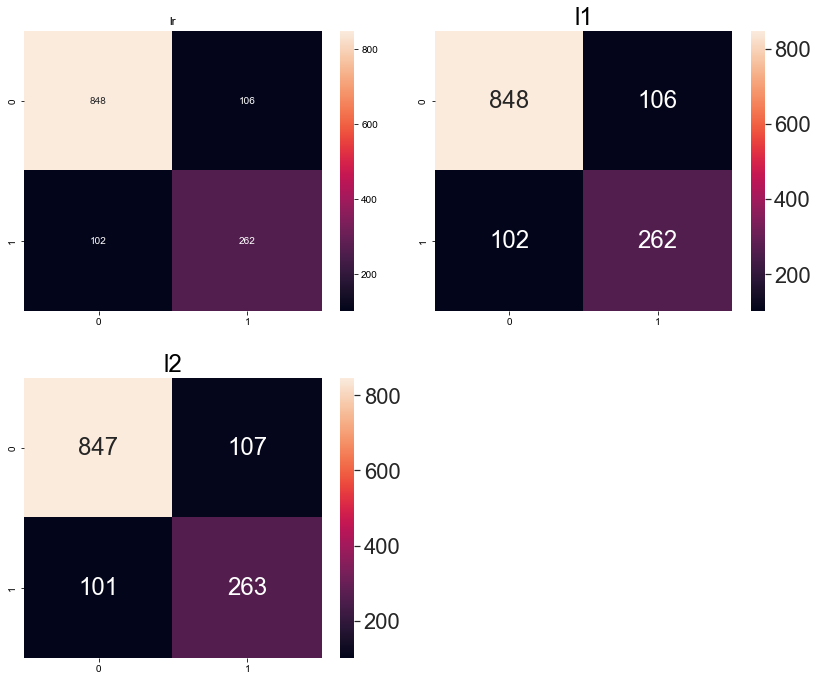

In [52]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    sns.set(font_scale=2);
    
plt.tight_layout()

In [53]:
# # Hyperparameter Tuning by Creating the GridSearchCV model 
model_comparison = pd.DataFrame(columns=['Model','Accuracy','Execution time'])
import time
t0 = time.time()
accuracy_logistic_model = lr_l2.score(X_test, y_test)
t1 = time.time()
from sklearn.model_selection import GridSearchCV
model_log = LogisticRegression()
param_grid = {'C': np.logspace(-3,3,7),
              'solver'  : ['liblinear'],
              'penalty' : ['l2'],
             'max_iter':[1000],}

grid = GridSearchCV(model_log, param_grid, verbose=3)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

model_comparison = model_comparison.append(
    {'Model': 'Logistic Model',
     'Accuracy': accuracy_logistic_model,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.797 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.798 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear;, score=0.818 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear;, score=0.819 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear;, score=0.841 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear;, score=0.828 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l2, solve

Decision tree machine learning
Introduction Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.



-----------------------------------------------------------
Accuracy of Decision Tree:  0.8292867981790591
Execution time: 0.02498484 seconds
-----------------------------------------------------------


<Figure size 432x288 with 0 Axes>

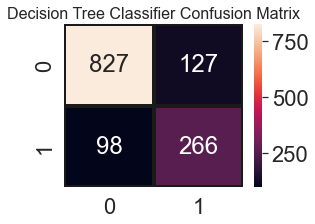

In [54]:


# mesuremnet of execution time
import time
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

t0 = time.time()
decision_tree_model.fit(X_train,y_train)
t1 = time.time()
 
accuracy_decision_tree = decision_tree_model.score(X_test, y_test)
print("\n\n-----------------------------------------------------------")
print("Accuracy of Decision Tree: ", accuracy_decision_tree)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

# Decision Tree Classifier gives very low accuracy score.

decision_tree_prediction = decision_tree_model.predict(X_test)

plt.figure(11)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, decision_tree_prediction),
                annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Decision Tree Classifier Confusion Matrix", fontsize=16)
plt.show()

model_comparison = model_comparison.append(
    {'Model': 'Decision Tree Classifier',
     'Accuracy': accuracy_decision_tree,
     'Execution time': '%0.8f seconds' % (t1 - t0)},ignore_index= True)



RANDOM FOREST-Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.



-----------------------------------------------------------
Accuracy of Random Forest:  0.8679817905918058
Execution time: 1.20216346 seconds
-----------------------------------------------------------


<Figure size 432x288 with 0 Axes>

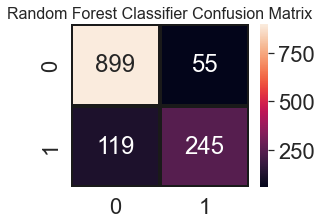

In [55]:


from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=500,
                                  oob_score = True, n_jobs = -1,
                                  random_state=42, max_features = "auto",
                                  max_leaf_nodes = 30)

t0 = time.time()
random_forest_model.fit(X_train, y_train)
t1 = time.time()

accuracy_random_forest = random_forest_model.score(X_test, y_test)

print("\n\n-----------------------------------------------------------")
print("Accuracy of Random Forest: ", accuracy_random_forest)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

random_forest_prediction = random_forest_model.predict(X_test)

plt.figure(12)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, random_forest_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("Random Forest Classifier Confusion Matrix", fontsize=16)
plt.show()

model_comparison = model_comparison.append(
    {'Model': 'Random Forest Classifier',
     'Accuracy': accuracy_random_forest,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)

The Random Forest classifier contains more decision trees on various subsets of the given dataset. The predictive accuracy of that dataset is improved by taking the prediction from every tree. Bulk prediction votes of every random tree in the forest are processed and the ultimate output is given.



-----------------------------------------------------------
Accuracy of Support Vector Machine:  0.8429438543247344
Execution time: 0.77257276 seconds
-----------------------------------------------------------


<Figure size 432x288 with 0 Axes>

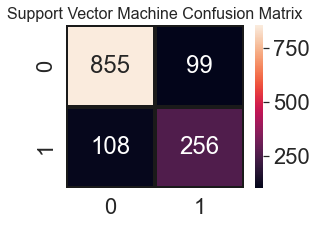

In [56]:
# SUPPORT VECTOR MACHINE

from sklearn.svm import SVC

svc_model = SVC(random_state = 42)

t0 = time.time()
svc_model.fit(X_train,y_train)
t1 = time.time()

accuracy_svc = svc_model.score(X_test,y_test)

print("\n\n-----------------------------------------------------------")
print("Accuracy of Support Vector Machine: ", accuracy_svc)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

svc_prediction = svc_model.predict(X_test)

plt.figure(13)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)


plt.title("Support Vector Machine Confusion Matrix", fontsize=16)
plt.show()

model_comparison = model_comparison.append(
    {'Model': 'Support Vector Machine',
     'Accuracy': accuracy_svc,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)

K-Nearest Neighbor (KNN) is a classification algorithm used for assigning a class to a new data point. K is an integer value specified by the user, and the classifier determines the class of a data point by the majority voting principle.



-----------------------------------------------------------
Accuracy of K-Nearest Neighbor:  0.8376327769347496
Execution time: 0.00397849 seconds
-----------------------------------------------------------


<Figure size 432x288 with 0 Axes>

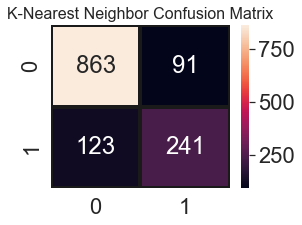

In [57]:
# K-NEAREST NEIGHBOR (KNN)

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 10)

t0 = time.time()
knn_model.fit(X_train,y_train)
t1 = time.time()

accuracy_knn = knn_model.score(X_test,y_test)

print("\n\n-----------------------------------------------------------")
print("Accuracy of K-Nearest Neighbor: ", accuracy_knn)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

knn_prediction = knn_model.predict(X_test)

plt.figure(14)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("K-Nearest Neighbor Confusion Matrix", fontsize=16)
plt.show()

model_comparison = model_comparison.append(
    {'Model': 'K-Nearest Neighbor',
     'Accuracy': accuracy_knn,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)

TENSORFLOW- deep learning
TensorFlow is a framework created by Google for creating Deep Learning models. Deep Learning is a category of machine learning models (=algorithms) that use multi-layer neural networks. Machine Learning has enabled us to build complex applications with great accuracy.

In [58]:
len(X_train.columns)

19

In [59]:
import tensorflow as tf
from tensorflow import keras


tens_model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

tens_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )   

tens_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
165/165 [==============================] - 1s 769us/step - loss: 0.4984 - accuracy: 0.7426
Epoch 2/100
165/165 [==============================] - 0s 746us/step - loss: 0.3792 - accuracy: 0.8291
Epoch 3/100
165/165 [==============================] - 0s 756us/step - loss: 0.3535 - accuracy: 0.8380
Epoch 4/100
165/165 [==============================] - 0s 761us/step - loss: 0.3455 - accuracy: 0.8410
Epoch 5/100
165/165 [==============================] - 0s 731us/step - loss: 0.3386 - accuracy: 0.8431
Epoch 6/100
165/165 [==============================] - 0s 747us/step - loss: 0.3356 - accuracy: 0.8469
Epoch 7/100
165/165 [==============================] - 0s 751us/step - loss: 0.3329 - accuracy: 0.8441
Epoch 8/100
165/165 [==============================] - 0s 750us/step - loss: 0.3289 - accuracy: 0.8473
Epoch 9/100
165/165 [==============================] - 0s 744us/step - loss: 0.3277 - accuracy: 0.8482
Epoch 10/100
165/165 [==============================] - 0s 762us/step - l

In [60]:
tens_model.evaluate(X_test, y_test)

42/42 [==============================] - 0s 683us/step - loss: 0.3294 - accuracy: 0.8528


[0.32943710684776306, 0.8528072834014893]

In [61]:
tens_pred = tens_model.predict(X_test)
y_pred = []
for element in tens_pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

In [62]:
y_test[:10]

5368    0
4282    1
3153    0
834     0
3114    0
2556    0
1601    0
3639    0
4675    0
6882    0
Name: Customer Status, dtype: int8

In [63]:
# train model
history = tens_model.fit(X, y, epochs=400, batch_size=len(X), verbose=2)


Epoch 1/400
1/1 - 0s - loss: 0.2785 - accuracy: 0.8725
Epoch 2/400
1/1 - 0s - loss: 0.2791 - accuracy: 0.8716
Epoch 3/400
1/1 - 0s - loss: 0.2796 - accuracy: 0.8704
Epoch 4/400
1/1 - 0s - loss: 0.2799 - accuracy: 0.8705
Epoch 5/400
1/1 - 0s - loss: 0.2800 - accuracy: 0.8704
Epoch 6/400
1/1 - 0s - loss: 0.2799 - accuracy: 0.8708
Epoch 7/400
1/1 - 0s - loss: 0.2797 - accuracy: 0.8710
Epoch 8/400
1/1 - 0s - loss: 0.2794 - accuracy: 0.8705
Epoch 9/400
1/1 - 0s - loss: 0.2789 - accuracy: 0.8716
Epoch 10/400
1/1 - 0s - loss: 0.2785 - accuracy: 0.8719
Epoch 11/400
1/1 - 0s - loss: 0.2780 - accuracy: 0.8731
Epoch 12/400
1/1 - 0s - loss: 0.2774 - accuracy: 0.8740
Epoch 13/400
1/1 - 0s - loss: 0.2769 - accuracy: 0.8740
Epoch 14/400
1/1 - 0s - loss: 0.2765 - accuracy: 0.8731
Epoch 15/400
1/1 - 0s - loss: 0.2761 - accuracy: 0.8734
Epoch 16/400
1/1 - 0s - loss: 0.2757 - accuracy: 0.8742
Epoch 17/400
1/1 - 0s - loss: 0.2754 - accuracy: 0.8748
Epoch 18/400
1/1 - 0s - loss: 0.2752 - accuracy: 0.8742
E

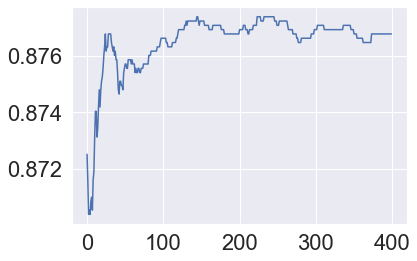

In [64]:
# plot metrics
plt.plot(history.history['accuracy'])
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       954
           1       0.74      0.73      0.73       364

    accuracy                           0.85      1318
   macro avg       0.82      0.81      0.81      1318
weighted avg       0.85      0.85      0.85      1318



42/42 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8612


-----------------------------------------------------------
Accuracy of Tensor flow:  [0.3099547028541565, 0.861153244972229]
Execution time: 0.00397849 seconds
-----------------------------------------------------------


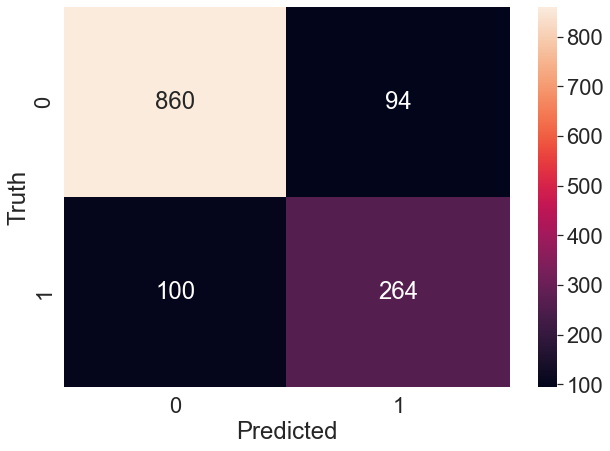

In [66]:
accuracy_tensor_flow = tens_model.evaluate(X_test,y_test)

print("\n\n-----------------------------------------------------------")
print("Accuracy of Tensor flow: ", accuracy_tensor_flow)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model_comparison = model_comparison.append(
    {'Model': 'Tensor Flow Classifier',
     'Accuracy': accuracy_tensor_flow,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)

FINAL EVALUATION

In [67]:
model_comparison

Model                                 Accuracy  \
0            Logistic Model                                 0.842185   
1  Decision Tree Classifier                                 0.829287   
2  Random Forest Classifier                                 0.867982   
3    Support Vector Machine                                 0.842944   
4        K-Nearest Neighbor                                 0.837633   
5    Tensor Flow Classifier  [0.3099547028541565, 0.861153244972229]   

       Execution time  
0  0.00399184 seconds  
1  0.02498484 seconds  
2  1.20216346 seconds  
3  0.77257276 seconds  
4  0.00397849 seconds  
5  0.00397849 seconds

In [68]:
tens_model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC()])
tens_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
165/165 [==============================] - 1s 774us/step - loss: 0.2639 - auc: 0.9451
Epoch 2/100
165/165 [==============================] - 0s 817us/step - loss: 0.2626 - auc: 0.9455
Epoch 3/100
165/165 [==============================] - 0s 829us/step - loss: 0.2625 - auc: 0.9455
Epoch 4/100
165/165 [==============================] - 0s 847us/step - loss: 0.2634 - auc: 0.9453
Epoch 5/100
165/165 [==============================] - 0s 841us/step - loss: 0.2629 - auc: 0.9455
Epoch 6/100
165/165 [==============================] - 0s 859us/step - loss: 0.2623 - auc: 0.9459
Epoch 7/100
165/165 [==============================] - 0s 962us/step - loss: 0.2619 - auc: 0.9460
Epoch 8/100
165/165 [==============================] - 0s 871us/step - loss: 0.2624 - auc: 0.9458
Epoch 9/100
165/165 [==============================] - 0s 804us/step - loss: 0.2625 - auc: 0.9458
Epoch 10/100
165/165 [==============================] - 0s 829us/step - loss: 0.2622 - auc: 0.9457
Epoch 11/100
165/16

In [69]:
tens_model.evaluate(X_test, y_test)

42/42 [==============================] - 1s 2ms/step - loss: 0.3235 - auc: 0.9214


[0.3234836757183075, 0.9213576912879944]

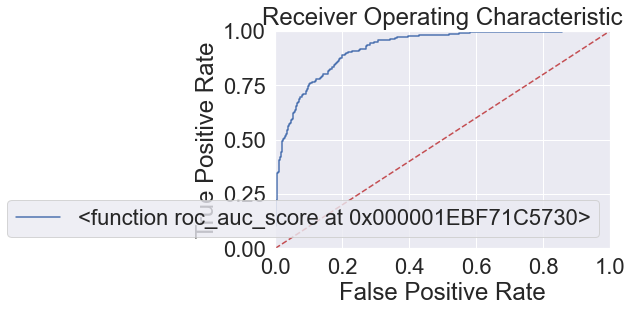

In [70]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
tens_pred = tens_model.predict(X_test) #tensorflow model prediction
#print(probs)
preds = tens_pred[:,0]
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, preds)
auc_keras = auc(fpr_keras, tpr_keras)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, 'b', label = roc_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()